In [1]:
%matplotlib inline
from statsImport import *
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

sns.set(font_scale=1.2)
graph.style.use('fivethirtyeight')
warnings.simplefilter('ignore')

,YEAR,ROLL,UNEM,HGRAD,INC
count,29.000000,29.000000,29.000000,29.000000,29.000000
mean,15.000000,12707.034483,7.758621,16528.137931,2729.482759
std,8.514693,3254.076987,1.122980,2926.926676,461.429194
min,1.000000,5501.000000,6.000000,9552.000000,1923.000000
25%,8.000000,10167.000000,7.000000,15723.000000,2351.000000
50%,15.000000,14395.000000,8.000000,17203.000000,2863.000000
75%,22.000000,14969.000000,8.000000,18266.000000,3127.000000
max,29.000000,16081.000000,10.000000,19800.000000,3345.000000


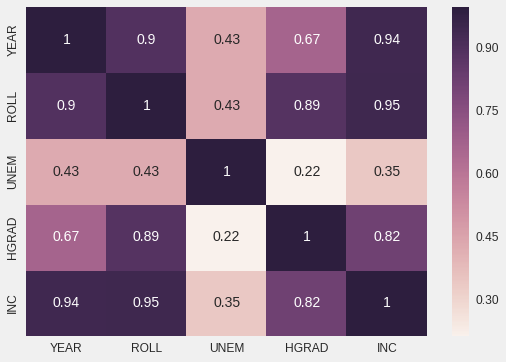

,YEAR,ROLL,UNEM,HGRAD,INC
0,1,5501,8,9552,1923
1,2,5945,7,9680,1961
2,3,6629,7,9731,1979
3,4,7556,8,11666,2030
4,5,8716,7,14675,2112


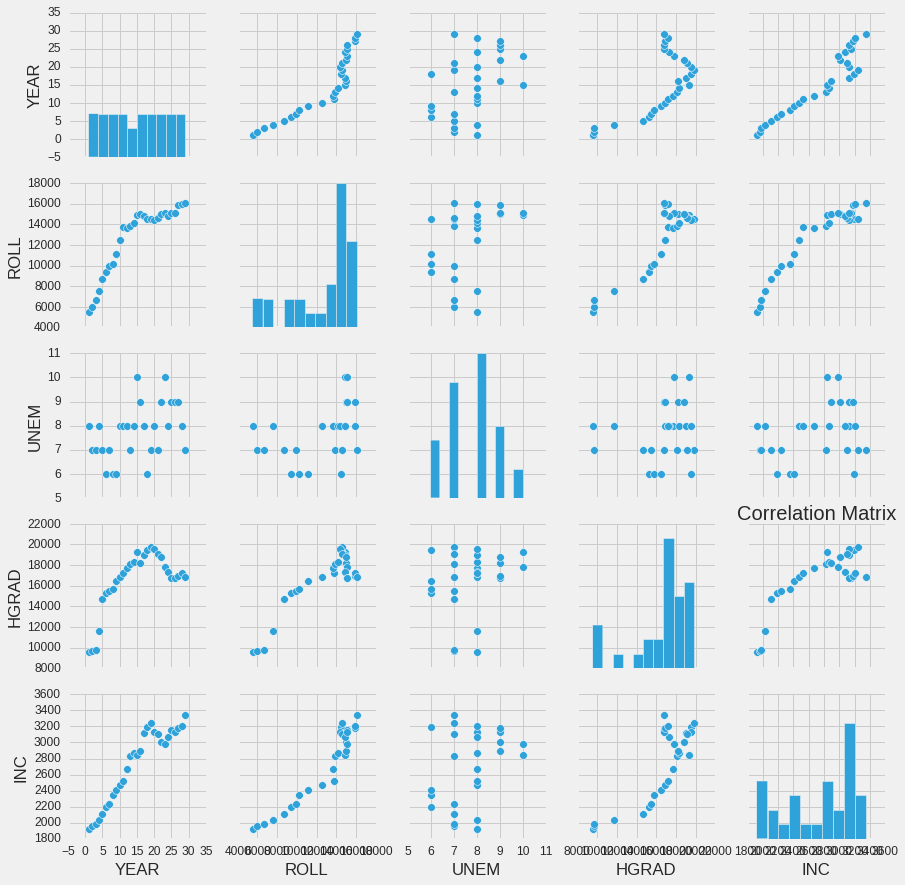

In [2]:
data = pd.read_csv('data/enrollmentforecast.txt', delimiter='\t')

display(data.describe())

sns.heatmap(data.corr(), annot=True)
graph.show()

display(data.head())

sns.pairplot(data, plot_kws=dict(s=60))
graph.title('Correlation Matrix')
graph.show()

# Question 1

What is the mean of each of the variables?

In [3]:
display(Markdown('**Answer:**'))

for col_name, average in zip(data.columns, data.mean()):
    display(Markdown('The mean for {} is {}.'.format(col_name, round(average, 2))))

**Answer:**

The mean for YEAR is 15.0.

The mean for ROLL is 12707.03.

The mean for UNEM is 7.76.

The mean for HGRAD is 16528.14.

The mean for INC is 2729.48.

# Question 2

Please plot fall undergraduate enrollment by income

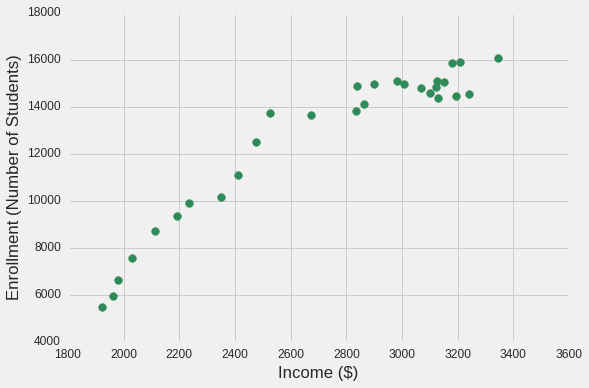

In [4]:
graph.scatter(data['INC'], data['ROLL'], s=60, color='seagreen')
graph.xlabel('Income ($)')
graph.ylabel('Enrollment (Number of Students)')
graph.show()

# Question 3

How do you interpret the significance of the Shapiro-Wilk test (i.e., what does P < 0.05
mean)?

**Answer**: If the p value is less than the critical value (in this case $\alpha$ is $0.05$) then the data is non-normally distributed.

REJECT non-normal! p = 0.00018526706844568253


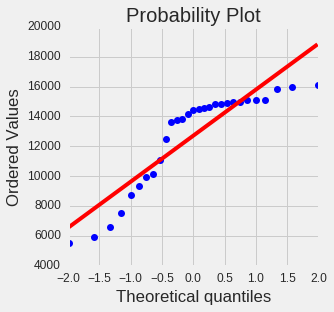

REJECT non-normal! p = 0.030134648084640503


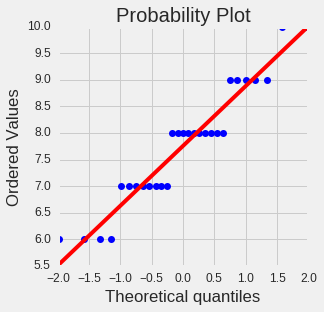

REJECT non-normal! p = 0.0002103583829011768


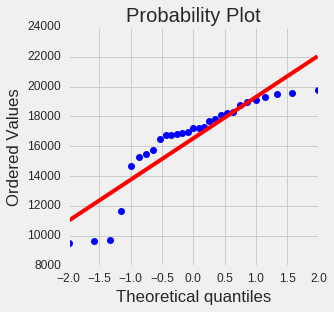

REJECT non-normal! p = 0.005670929793268442


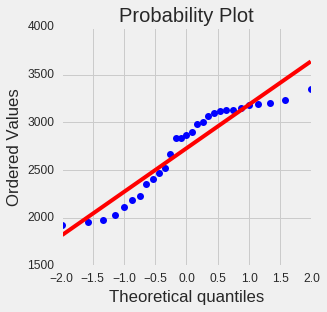

In [5]:
for col in data.columns:
    _, p = shapiro(data[col])
    
    if p < 0.05:
        print('REJECT non-normal! p =', p)
        
        graph.figure(figsize=(4, 4))
        probplot(data[col], plot=graph)
        graph.show()

# Question 4

- **What is the correlation between HGRAD and INC?** r = 0.82
- **Is the correlation significant?** Yes because with the p-value being 5.2 x 10<sup>-8</sup> is less than the critical value of 0.05
- **Interpret the correlation and the significance both “biologically” and “statistically”.** The correlation presented shows that positive changes in High School Graudation numbers 'HGAD' has positive changes in Income 'INC'. This is statistically significant because the p-value is the less than the critical value ($\alpha = 0.05$). It is 'biologically' significant because there is a real relationship between high school graduation rates and income.
 
Julian Olden (ANN) 

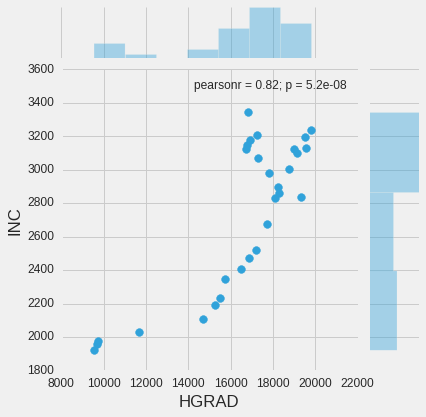

In [6]:
sns.jointplot(x='HGRAD', y='INC', data=data, joint_kws=dict(s=60))
graph.show()

# Question 5

- **Please interpret the 2 predictor and 3 predictor multiple regression models both “statistically” and “biologically”. (8 marks)** The 2 and 3 predictor models were both statistically significant. Denomstrated by all the variables p-values are well below 0.05 and in the intercepts of the models' p-values were also below 0.05. In addressing the 'biological' significance, both models shows that High School Graduation 'HGRAD' and 'UNEM' have a significant positive relationship with Undergraduate Enrollment 'ROLL'. The 3 predictor model has Income 'INC' predictor is also has a significant positive relationship with Undergraduate Enrollment 'ROLL'.
- **Which is the “best” fit model and why? (3 marks)** I believe that the 3 predictor model is the better model dispite having 2 predictors with some colinearity (but not VIF numbers greater than 5) and having increased complexity because of the triad of lower AIC and BIC information scores and greater adjusted R<sup>2</sup>. Cross validation or out of sample prediction would better help show this in my opinion.
- **Do the variance inflation factors suggest that multicollinearity is a problem for the 2 and 3 predictor models? (1 mark)** Both models have some collinearity and the 3 predictor model have considerably more _however_ none of the models have variables with VIF greater than 5 so it should not be a problem.

In [7]:
# ROLL ~ UNEM + HGRAD
# ROLL ~ UNEM + HGRAD + INC

display(Markdown('$$ ROLL = m_1 UNEM + m_2 HGRAD + b $$'))
model_2x = ols('ROLL ~ UNEM + HGRAD', data=data).fit()
display(sm.stats.anova_lm(model_2x))
print(model_2x.summary())

display(Markdown('$$ ROLL = m_1 UNEM + m_2 HGRAD + m_3 INC + b $$'))
model_3x = ols('ROLL ~ UNEM + HGRAD + INC', data=data).fit()
display(sm.stats.anova_lm(model_3x))
print(model_3x.summary())

$$ ROLL = m_1 UNEM + m_2 HGRAD + b $$

,df,sum_sq,mean_sq,F,PR(>F)
UNEM,1.0,5.605167e+07,5.605167e+07,33.642008,4.128424e-06
HGRAD,1.0,1.971217e+08,1.971217e+08,118.311713,3.579310e-11
Residual,26.0,4.331915e+07,1.666121e+06,NaN,NaN


                            OLS Regression Results                            
Dep. Variable:                   ROLL   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     75.98
Date:                Thu, 27 Oct 2016   Prob (F-statistic):           1.38e-11
Time:                        14:32:13   Log-Likelihood:                -247.29
No. Observations:                  29   AIC:                             500.6
Df Residuals:                      26   BIC:                             504.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -8342.4876   1993.031     -4.186      0.0

$$ ROLL = m_1 UNEM + m_2 HGRAD + m_3 INC + b $$

,df,sum_sq,mean_sq,F,PR(>F)
UNEM,1.0,5.605167e+07,5.605167e+07,116.301965,6.837698e-11
HGRAD,1.0,1.971217e+08,1.971217e+08,409.009017,5.200544e-17
INC,1.0,3.127042e+07,3.127042e+07,64.883192,2.073310e-08
Residual,25.0,1.204874e+07,4.819494e+05,NaN,NaN


                            OLS Regression Results                            
Dep. Variable:                   ROLL   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     196.7
Date:                Thu, 27 Oct 2016   Prob (F-statistic):           1.65e-17
Time:                        14:32:13   Log-Likelihood:                -228.74
No. Observations:                  29   AIC:                             465.5
Df Residuals:                      25   BIC:                             470.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -8895.0151   1074.110     -8.281      0.0